# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
**Source**
- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

**Important**: We mentioned in our data ethics lesson earlier that data can include offensive or inappropriate language at times. This is already becoming very apparent in the Boston Data, which includes a racial variable. 
Note that the Boston Housing data was constructed in the 1970’s, and is based on US census Data. On census.gov, you can read the following note:
> "Census statistics date back to 1790 and reflect the growth and change of the United States. Past census reports contain some terms that today's readers may consider obsolete and inappropriate. As part of our goal to be open and transparent with the public, we are improving access to all Census Bureau original publications and statistics, which serve as a guide to the nation's history."

With that note, it is important to absolutely handle with care, and it is strongly adviced to _not_ use the racial variable when creating a predictive model.


In [57]:
#Loading the data (which is stored in the file 'train.csv')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_csv('train.csv')

In [58]:
# Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [59]:
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
# Create meaningful subsets of the data using selection operations like .loc, .iloc, or related operations. 
# Explain why you used the chosen subsets and do this for three possible 2-way splits. 
# State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. 

# Examples of potential splits:
# Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't
# Create two new DataFrames based on a certain split for crime rate

# Use histograms and scatter plots to observe differences for the subsets of the data. 
# Make sure to use subplots so it is easy to compare the relationships.

I want to investigate the neighborhoods with older houses versus those with newer ones.

In [83]:
old_hood = data[data['age'] >= 76.7]
new_hood = data[data['age'] < 76.7]

In [84]:
old_hood.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,283.803571,5.970432,1.178571,15.606429,0.071429,0.636155,6.115387,91.893452,2.387382,13.220238,492.589286,18.941071,336.588869,16.232262,19.880357
std,152.407280,9.427959,4.825173,6.094180,0.258309,0.099597,0.769029,6.837201,0.965217,9.774356,175.128809,2.337416,107.717279,7.411929,9.918182
min,2.000000,0.027310,0.000000,2.460000,0.000000,0.448000,3.561000,76.700000,1.129600,1.000000,188.000000,13.000000,3.500000,1.730000,5.000000
25%,145.250000,0.344505,0.000000,9.900000,0.000000,0.546250,5.816750,86.500000,1.768975,4.000000,307.000000,17.800000,349.142500,10.620000,13.800000
50%,314.500000,2.278130,0.000000,18.100000,0.000000,0.624000,6.113000,93.700000,2.164750,6.000000,437.000000,20.200000,387.790000,15.965000,17.800000
75%,428.250000,8.212457,0.000000,18.100000,0.000000,0.700000,6.417250,97.550000,2.715400,24.000000,666.000000,20.200000,395.675000,20.492500,22.375000
max,506.000000,73.534100,28.000000,27.740000,1.000000,0.871000,8.725000,100.000000,6.818500,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [85]:
new_hood.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,217.503030,0.702795,20.372727,6.902121,0.048485,0.476697,6.418582,44.129091,5.056532,5.981818,324.454545,17.946061,382.759273,8.731030,25.709697
std,135.550622,2.198525,28.811819,4.781913,0.215442,0.061191,0.595229,19.916325,1.838628,5.552930,116.214292,1.818687,47.742538,4.077132,7.275956
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,4.973000,6.000000,1.794000,1.000000,188.000000,12.600000,3.650000,1.980000,8.400000
25%,82.000000,0.045600,0.000000,3.440000,0.000000,0.431000,5.981000,29.700000,3.651900,4.000000,247.000000,16.600000,388.450000,5.700000,21.200000
50%,230.000000,0.088290,0.000000,5.860000,0.000000,0.458000,6.326000,45.100000,5.100400,5.000000,296.000000,18.300000,393.300000,8.230000,23.800000
75%,307.000000,0.206080,30.000000,9.690000,0.000000,0.515000,6.750000,61.500000,6.336100,6.000000,337.000000,19.200000,396.900000,10.970000,28.700000
max,502.000000,15.575700,100.000000,25.650000,1.000000,0.718000,8.337000,76.500000,10.710300,24.000000,666.000000,21.100000,396.900000,29.550000,50.000000


<IPython.core.display.Javascript object>


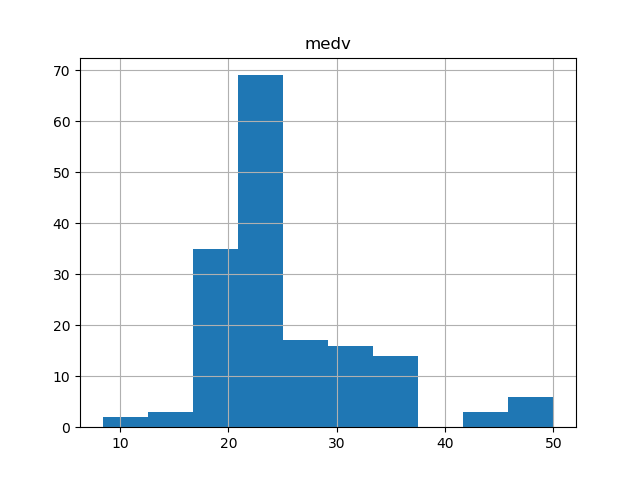

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014BD4018BE0>]],
      dtype=object)

In [86]:
new_hood.hist('medv')

<IPython.core.display.Javascript object>


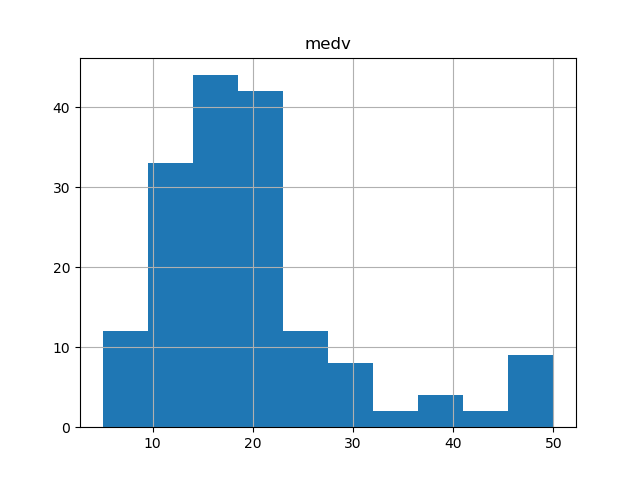

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014BD453C5C0>]],
      dtype=object)

In [87]:
old_hood.hist('medv')

While both historams show home values clustered around 20, the older homes are noticably skewed left, whereas, the newer homes are skewed right, meaning that the newer houses are probably more valuable. 

<IPython.core.display.Javascript object>


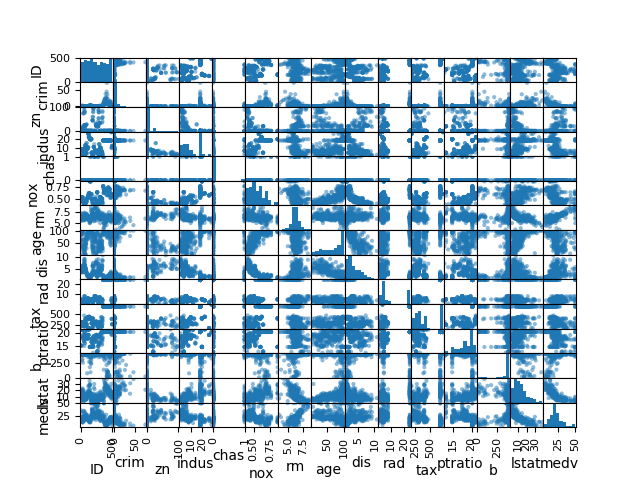

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014BD43A9E48>,
      dtype=object)

In [102]:
pd.plotting.scatter_matrix(data)

<IPython.core.display.Javascript object>


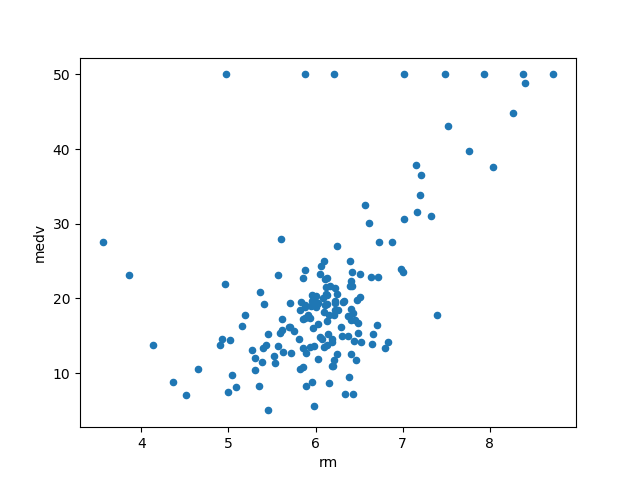

In [103]:
old_hood.plot.scatter('rm','medv')

<IPython.core.display.Javascript object>


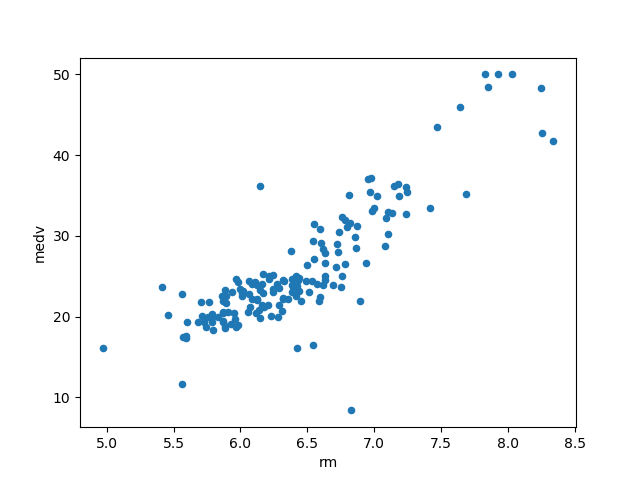

In [104]:
new_hood.plot.scatter('rm','medv')

According to the scatter plots, the number of rooms is more closely correlated with median value than with older homes, although a clear positive correlation exists in both, this observation is likely due to more dispersed values of older homes, which require upkeep and therefore will be more or less valuable depending on the quality of their caretaker's abilities. 

Just some additional practice.

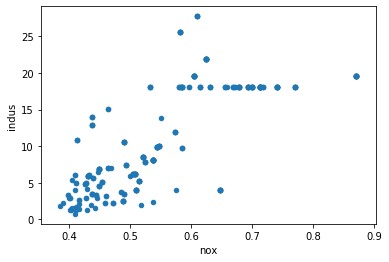

In [22]:
data.plot.scatter('nox', 'indus')

There appears to be a positive correlation between industrial areas and pollution numbers. Next, we can calculate the correlation coefficient.

In [36]:
import numpy as np
import math

def mean_normalize(var):
    var_mean = sum(var)/ len(var)
    normalized_values = []
    for value in var:
        normalized_values.append(value - var_mean)
    return normalized_values

def dot_product(x, y):
    index_range = range(0,len(x))
    list_of_products = []
    for index in index_range:
        list_of_products.append(x[index] * y[index])
    return sum(list_of_products)

def correlation(var1, var2):
    normalized_var1 = mean_normalize(var1)
    normalized_var2 = mean_normalize(var2)
    
    squared_values_var1 = []
    squared_values_var2 = []
    
    for value in normalized_var1:
        squared_values_var1.append(value*value)
    squared_var1 = (sum(squared_values_var1))
        
    for value in normalized_var2:
        squared_values_var2.append(value*value)
    squared_var2 = (sum(squared_values_var2))
    
    numerator = dot_product(normalized_var1, normalized_var2)
    denominator = math.sqrt(squared_var1 * squared_var2)
    
    return round(numerator/denominator, 2)
    
correlation(data['nox'], data['indus'])

0.75

An r value of .75 supports the conclusion that high industrial density is correlated with nox concentration. Next, let's look at whether those factors impact home value. 

-0.41
-0.47


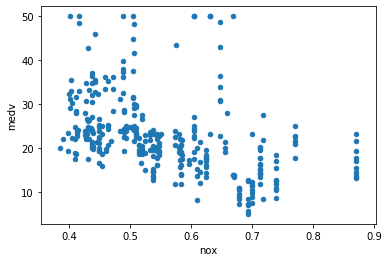

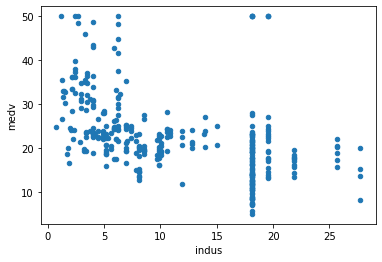

In [39]:
data.plot.scatter('nox', 'medv'), data.plot.scatter('indus', 'medv')
print (correlation(data['nox'], data['medv']))
print (correlation(data['indus'], data['medv']))

Both plots show a slight negative correlation, which suggests that both industry and pollution negativly effect home values, which makes sense. I want to know which value correlates most with home values.

In [101]:
def find_corr(value):
    corr_list = []
    for col in data.columns:
        corr_list.append('The correlation between '+ str(col) +' and ' + str(value) + ' is ' + str(correlation(data[col], data[value])))
    return corr_list

find_corr('medv')

['The correlation between ID and medv is -0.22',
 'The correlation between crim and medv is -0.41',
 'The correlation between zn and medv is 0.34',
 'The correlation between indus and medv is -0.47',
 'The correlation between chas and medv is 0.2',
 'The correlation between nox and medv is -0.41',
 'The correlation between rm and medv is 0.69',
 'The correlation between age and medv is -0.36',
 'The correlation between dis and medv is 0.25',
 'The correlation between rad and medv is -0.35',
 'The correlation between tax and medv is -0.45',
 'The correlation between ptratio and medv is -0.48',
 'The correlation between b and medv is 0.34',
 'The correlation between lstat and medv is -0.74',
 'The correlation between medv and medv is 1.0']

It seems that housing value is somewhat correlated with many of the other values in the study. In particular, number of rooms and lower status, which correlate positively and negatively respectively.

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!